# Expanding ice XI and calculating the radial distribution

In [19]:
import numpy as np
from prody import *
from matplotlib import pyplot as plt
import sys
import time

sys.path.insert(0, '../src/')

import parameters 
reload(parameters)
from parameters import *

import radial_distribution
reload(radial_distribution)
from radial_distribution import *

import pdb_handling
reload(pdb_handling)
from pdb_handling import *

### Parameters

In [34]:
# g(r) parameters
max_r = 26 #Angst
bin_width = .1 
nbins = int(max_r/bin_width) 

# random displacement parameters
n_random = 1
dr = 0.2

# ice parameters
file_name, density, dx, dy, dz = iceIX_parameters()
n_expand=4#13

In [4]:
save_path = '../analysis/'
data_path = '../data/'
data_file = '%s%s.pdb'%(data_path,file_name)

### Load data

In [ ]:
wtr1 = parsePDB(data_file)

In [35]:
oxgs = wtr1.select('oxygen')
xyz = oxgs.getCoords()

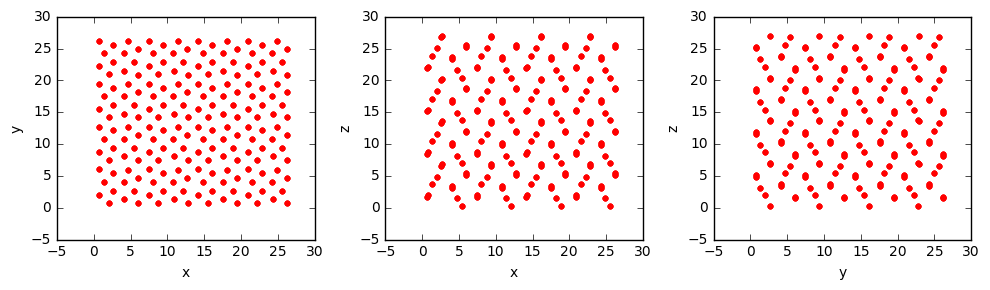

In [46]:
plt.figure(figsize=[10,3])
plt.subplot(1,3,1)
plt.scatter(xyz[:,0],xyz[:,1],c='r',s=10, edgecolor='r')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,3,2)
plt.scatter(xyz[:,0],xyz[:,2],c='r',s=10, edgecolor='r')
plt.xlabel('x')
plt.ylabel('z')
plt.subplot(1,3,3)
plt.scatter(xyz[:,1],xyz[:,2],c='r',s=10, edgecolor='r')
plt.xlabel('y')
plt.ylabel('z')
plt.tight_layout()
plt.show()

### Expand ice

In [37]:
oxgs_expanded = expand_ice(oxgs,n=n_expand,dx=dx,dy=dy,dz=dz)
xyz_expanded  = oxgs_expanded.getCoords()

Crystal expanded: 107A x 107A x 107A 


Remove doubles

In [38]:
xyz_unique = np.unique(xyz_expanded,axis=0)

Save expanded

In [39]:
#outfile = '%s%s_exp.pdb'%(data_path,file_name)
#writePDB(outfile,oxgs_expanded)

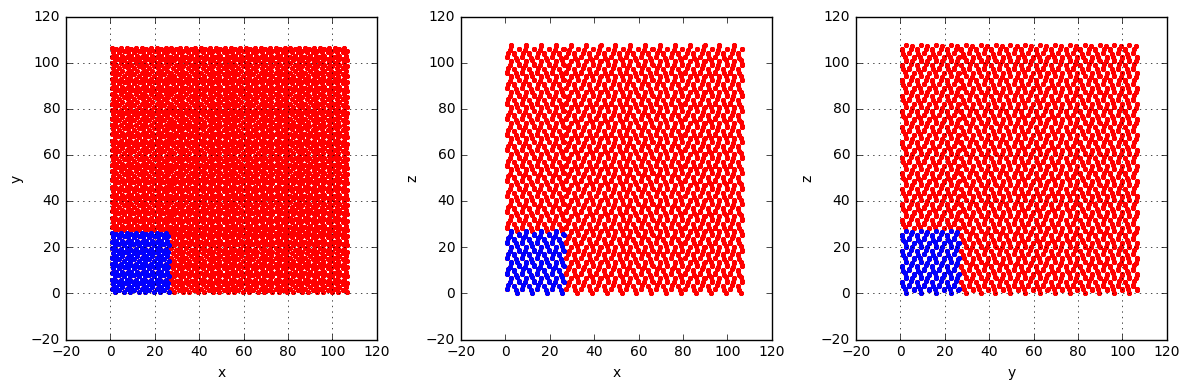

In [57]:
plt.figure(figsize=[12,4])
plt.subplot(1,3,1)

plt.scatter(xyz_unique[:,0],xyz_unique[:,1],c='r',s=5, edgecolor='r')
plt.scatter(xyz[:,0],xyz[:,1],c='b',s=5, edgecolor='b')
plt.xlabel('x')
plt.ylabel('y')
#plt.xlim(0.58,0.6)
#plt.ylim(0.,3)
plt.grid()
plt.subplot(1,3,2)
plt.scatter(xyz_unique[:,0],xyz_unique[:,2],c='r',s=5, edgecolor='r')
plt.scatter(xyz[:,0],xyz[:,2],c='b',s=5, edgecolor='b')
plt.xlabel('x')
plt.ylabel('z')

plt.subplot(1,3,3)
plt.scatter(xyz_unique[:,1],xyz_unique[:,2],c='r',s=5, edgecolor='r')
plt.scatter(xyz[:,1],xyz[:,2],c='b',s=5, edgecolor='b')
plt.xlabel('y')
plt.ylabel('z')
plt.grid()
plt.tight_layout()

plt.show()

### Calculate g(r)

Radial distribution of the expanded crystal

In [47]:
t0 = time.time()
gr0 = calculate_gr(xyz_unique,nbins=nbins,bin_width=bin_width,density=density,radius = max_r)
r = np.arange(0,nbins*bin_width,bin_width)
print time.time()-t0

410.179747105


Introduce disorder 

In [48]:
gr = np.zeros(nbins)
n_oxygens = xyz_unique.shape[0]

rnd = np.random.random_sample((n_oxygens,3))
t0 = time.time()
for i in range(n_random):
    rnd = np.random.random_sample((n_oxygens,3))
    dxyz = (rnd*2-1)*dr
    gr += calculate_gr(xyz_unique+dxyz,nbins=nbins,bin_width=bin_width,density=density,radius = max_r)
gr/=float(n_random)
print time.time()-t0

425.936071873


### plot results

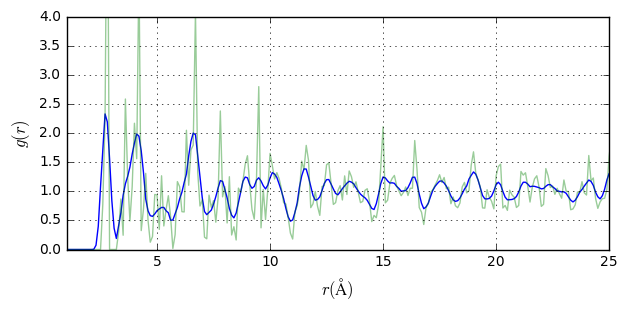

In [52]:
plt.figure(figsize=[7,3])
plt.plot(r,gr)
plt.plot(r,gr0,alpha=0.4)
plt.xlim(1,25)
plt.ylim(0,4)
plt.grid()
plt.ylabel(r'$g(r)$',size=12)
plt.xlabel(r'$r (\rm \AA)$',size=12)
plt.show()

In [53]:
save_file = '%sgr_%s_d=%d_dr=%.1f'%(save_path,file_name,n_expand*min([dx,dy,dz]),dr)
np.save(save_file,np.array([r,gr]))

#np.save('%sgr_expanded_disorder'%save_path,np.array([r,gr]))

### compare to iceIh

In [54]:
r1,gr1 = np.load('%sgr_ice1h_d=110_dr=0.2.npy'%save_path)
r2,gr2 = np.load('%sgr_ice12_d=104_dr=0.2.npy'%save_path)

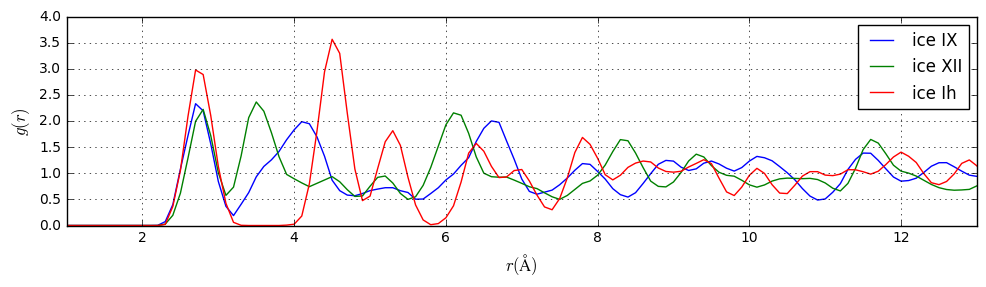

In [65]:
plt.figure(figsize=[10,3])
plt.plot(r,gr,label='ice IX')
plt.plot(r2,gr2/2,label='ice XII')
plt.plot(r1,gr1,label='ice Ih')

plt.xlim(1,13)
plt.ylim(0,4)
plt.grid()
plt.ylabel(r'$g(r)$',size=12)
plt.xlabel(r'$r (\rm \AA)$',size=12)
plt.legend()
plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/Fig_ice.png',dpi=300)
plt.show()